In [1]:
%load_ext autoreload
%autoreload 2

import networkx as nx

from qiskit_optimization.applications.ising.clique import Clique
from qiskit_optimization.algorithms import CplexOptimizer

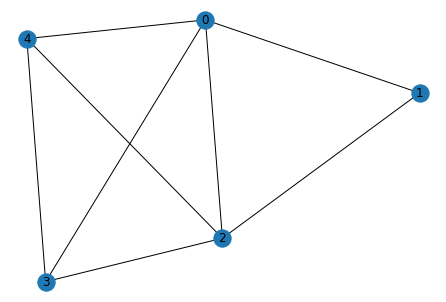

In [2]:
g=nx.gnm_random_graph(5,8, 123)
pos = nx.spring_layout(g, seed=111)
nx.draw(g, pos=pos, with_labels=True)

In [3]:
clique = Clique(g)

In [4]:
# If you specify "K", the output qp will be to find a clique of size K
qp = clique.to_quadratic_program(K=3)
qp

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: clique

Minimize
 obj:
Subject To
 c0: x_1 + x_3 <= 1
 c1: x_1 + x_4 <= 1
 c2: x_0 + x_1 + x_2 + x_3 + x_4 = 3

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4
End

In [5]:
optimizer = CplexOptimizer()
result = optimizer.solve(qp)
result

optimal function value: 0.0
optimal value: [1. 0. 1. 1. 0.]
status: SUCCESS

[0, 2, 3]
True
0.0


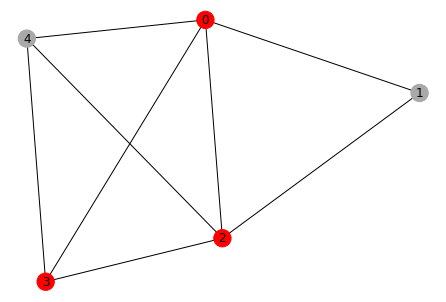

In [6]:
print(clique.interpret(result))
print(clique.is_feasible(result, K=3))
print(clique.evaluate(result, K=3))
clique.draw_graph(result, pos=pos)


In [7]:
# If you don't specify "K" (K=None), the output qp is to find the largest clique in the graph
qp = clique.to_quadratic_program()
qp

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: clique

Maximize
 obj: x_0 + x_1 + x_2 + x_3 + x_4
Subject To
 c0: x_1 + x_3 <= 1
 c1: x_1 + x_4 <= 1

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4
End

In [8]:
optimizer = CplexOptimizer()
result = optimizer.solve(qp)
result

optimal function value: 4.0
optimal value: [1. 0. 1. 1. 1.]
status: SUCCESS

[0, 2, 3, 4]
True
4.0


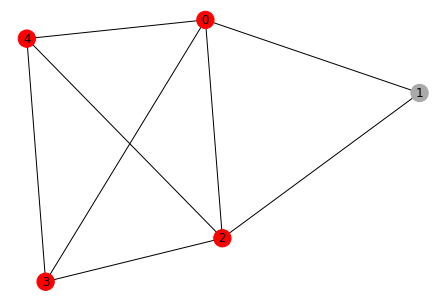

In [9]:
print(clique.interpret(result))
print(clique.is_feasible(result))
print(clique.evaluate(result))
clique.draw_graph(result, pos=pos)
